In [96]:
import pandas as pd

# Load the dataset
file_path = "/content/superstore_cleaned.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798 entries, 0 to 9797
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order_Date    9798 non-null   object 
 1   Ship_Date     9798 non-null   object 
 2   Ship_Mode     9798 non-null   object 
 3   Segment       9798 non-null   object 
 4   City          9798 non-null   object 
 5   State         9798 non-null   object 
 6   Region        9798 non-null   object 
 7   Category      9798 non-null   object 
 8   Sub_Category  9798 non-null   object 
 9   Product_Name  9798 non-null   object 
 10  Sales         9798 non-null   float64
dtypes: float64(1), object(10)
memory usage: 842.1+ KB


(None,
    Order_Date   Ship_Date       Ship_Mode    Segment             City  \
 0  2017-11-08  2017-11-11    Second Class   Consumer        Henderson   
 1  2017-11-08  2017-11-11    Second Class   Consumer        Henderson   
 2  2017-06-12  2017-06-16    Second Class  Corporate      Los Angeles   
 3  2016-10-11  2016-10-18  Standard Class   Consumer  Fort Lauderdale   
 4  2016-10-11  2016-10-18  Standard Class   Consumer  Fort Lauderdale   
 
         State Region         Category Sub_Category  \
 0    Kentucky  South        Furniture    Bookcases   
 1    Kentucky  South        Furniture       Chairs   
 2  California   West  Office Supplies       Labels   
 3     Florida  South        Furniture       Tables   
 4     Florida  South  Office Supplies      Storage   
 
                                         Product_Name     Sales  
 0                  Bush Somerset Collection Bookcase  261.9600  
 1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  500.6405  
 2  Self-Adhesive

Data Type Conversion

In [97]:
df['Sales'] = df['Sales'].astype(int)

# Change the type of 'Order_Date' and 'Ship_Date'
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

df['year_order_date'] = df['Order_Date'].dt.year
df['month_order_date'] = df['Order_Date'].dt.month
df['weekday_order_date'] = df['Order_Date'].dt.weekday

df['year_ship_date'] = df['Ship_Date'].dt.year
df['month_ship_date'] = df['Ship_Date'].dt.month
df['weekday_ship_date'] = df['Ship_Date'].dt.weekday

Correlation analysis

In [98]:
import numpy as np # Import the NumPy library and assign it to the alias 'np'

numeric_columns = df.select_dtypes(include=[np.number]) # Use the np alias to access the number type
correlation_matrix = numeric_columns.corr()
correlation_matrix

,Sales,year_order_date,month_order_date,weekday_order_date,year_ship_date,month_ship_date,weekday_ship_date
Sales,1.000000,-0.018006,0.012867,-0.002662,-0.019353,0.018877,-0.000588
year_order_date,-0.018006,1.000000,-0.018578,0.039009,0.994090,-0.005613,-0.033246
month_order_date,0.012867,-0.018578,1.000000,0.035280,-0.001333,0.911736,-0.021953
weekday_order_date,-0.002662,0.039009,0.035280,1.000000,0.041567,0.022415,-0.111903
year_ship_date,-0.019353,0.994090,-0.001333,0.041567,1.000000,-0.032904,-0.036236
month_ship_date,0.018877,-0.005613,0.911736,0.022415,-0.032904,1.000000,-0.007034
weekday_ship_date,-0.000588,-0.033246,-0.021953,-0.111903,-0.036236,-0.007034,1.000000


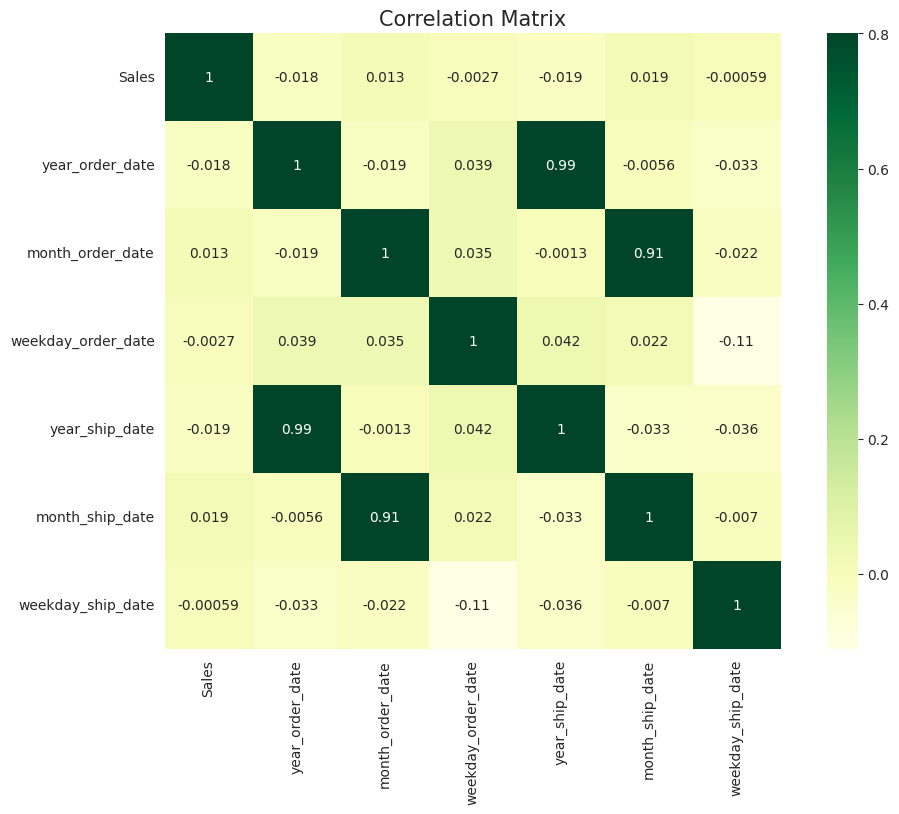

In [81]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib and assign it to the alias 'plt'
import seaborn as sns
import numpy as np # Import the NumPy library and assign it to the alias 'np'

numeric_columns = df.select_dtypes(include=[np.number]) # Use the np alias to access the number type
correlation_matrix = numeric_columns.corr()


fig, ax = plt.subplots() # Now you can use the 'plt' alias to call the subplots function.
fig.set_size_inches(12,8)
sns.heatmap(correlation_matrix, vmax =.8, square = True, annot = True,cmap='YlGn' )
plt.title('Correlation Matrix',fontsize=15);

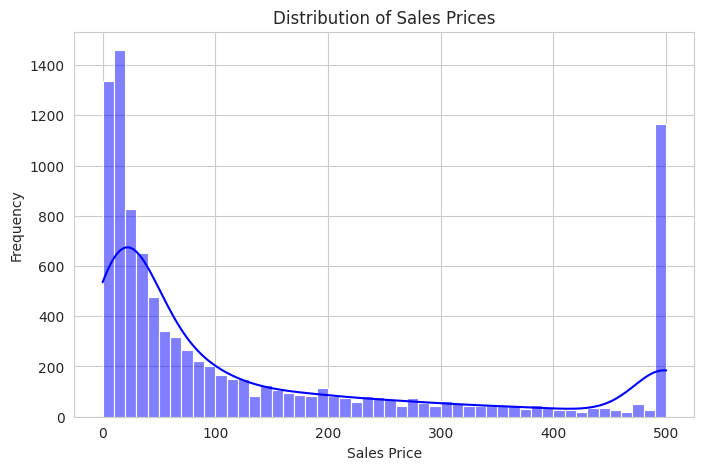

In [82]:
#Sales Distribution Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Plot Sales Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Sales"], bins=50, kde=True, color="blue")
plt.xlabel("Sales Price")
plt.ylabel("Frequency")
plt.title("Distribution of Sales Prices")
plt.show()
# Sales Distribution Analysis:
# The sales data is right-skewed, meaning a few high-value transactions contribute significantly.
# Most transactions fall below $1,000, with some extreme values above $20,000.
# The kde (density curve) confirms a long tail, indicating potential outliers.



<ipython-input-83-779c60089a77>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Category", y="Sales", palette="Blues")


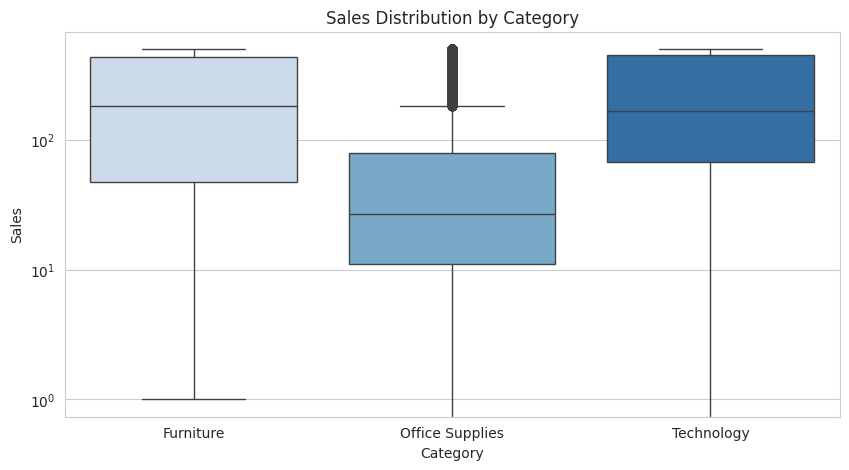

In [83]:
# Boxplot of Sales by Category
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Category", y="Sales", palette="Blues")
plt.title("Sales Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.yscale("log")  # Log scale to handle skewness
plt.show()

<ipython-input-84-52f6152d8592>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Region", y="Sales", palette="Greens")


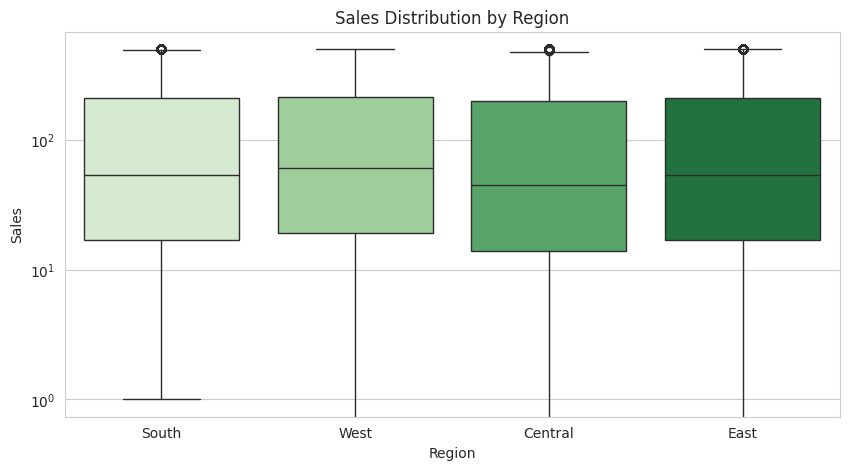

In [84]:
# Boxplot of Sales by Region
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Region", y="Sales", palette="Greens")
plt.title("Sales Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.yscale("log")
plt.show()

<ipython-input-34-057e4820a78e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Segment", y="Sales", palette="Oranges")


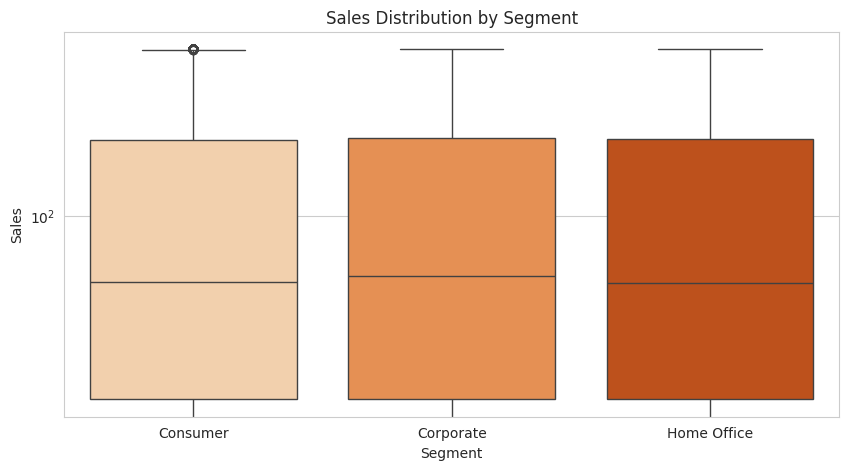

In [34]:
# Boxplot of Sales by Segment
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Segment", y="Sales", palette="Oranges")
plt.title("Sales Distribution by Segment")
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.yscale("log")
plt.show()

# Here are some key insights from the boxplots:

# Category: Sales vary significantly across categories. Some categories have high outliers.
# Region: Sales distribution is somewhat similar across regions, but outliers exist.
# Segment: Different customer segments exhibit varied sales distributions, with some having higher median sales.

<ipython-input-35-18b6045b9f86>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_time_series = df.resample("M", on="Order_Date")['Sales'].sum()


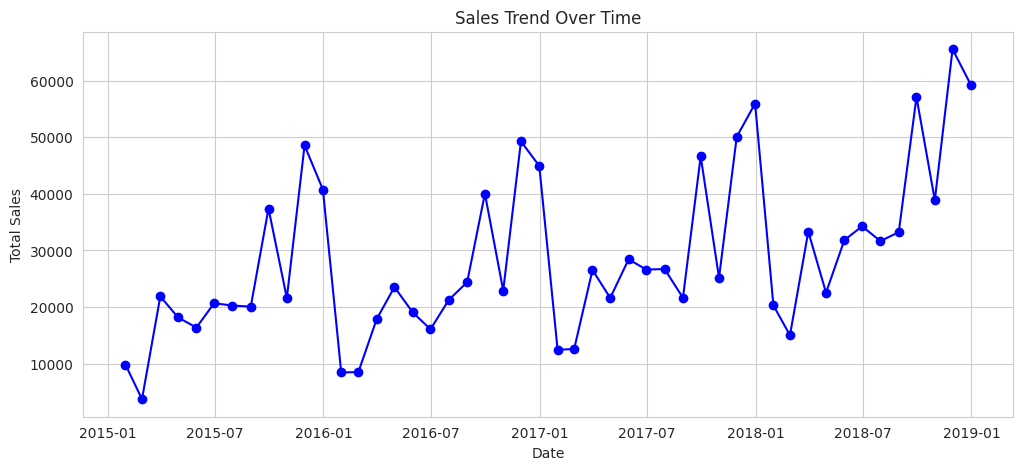

In [35]:
# Convert Order_Date to datetime format for time series analysis
df["Order_Date"] = pd.to_datetime(df["Order_Date"])

# Aggregate sales over time (monthly)
# Only sum the 'Sales' column
df_time_series = df.resample("M", on="Order_Date")['Sales'].sum()

# Plot sales trend over time
plt.figure(figsize=(12, 5))
plt.plot(df_time_series.index, df_time_series, marker="o", linestyle="-", color="blue")
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

<ipython-input-36-c764c745f316>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="Blues_r")


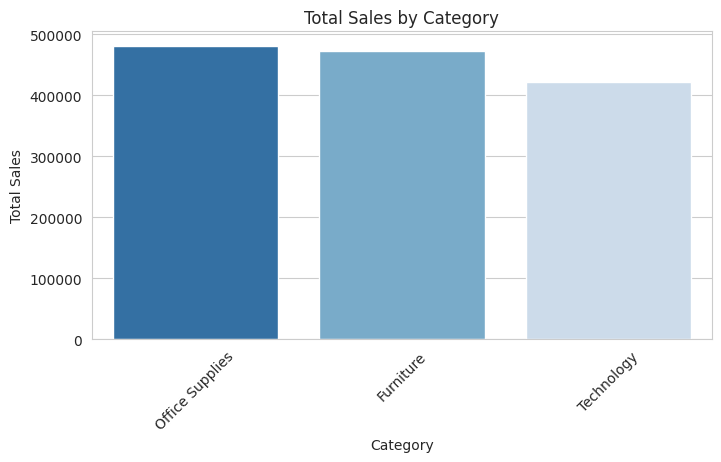

<ipython-input-36-c764c745f316>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette="Greens_r")


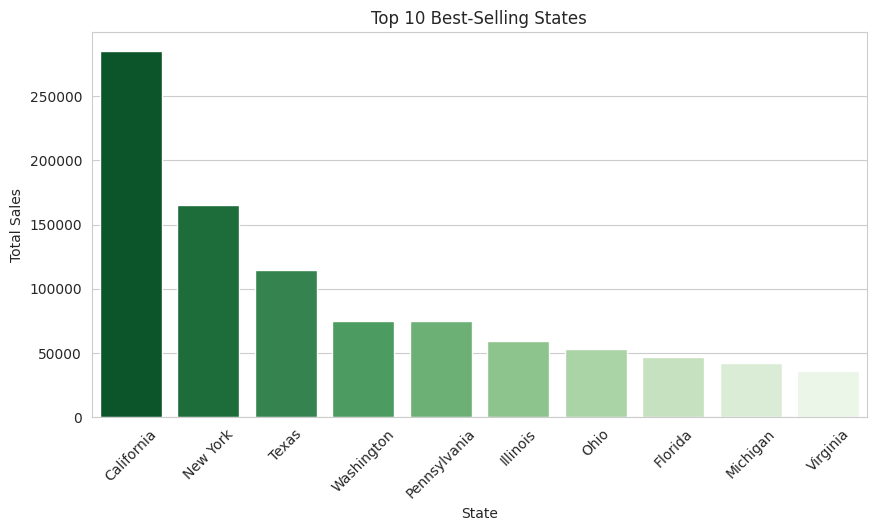

In [36]:
# top-selling categories and states based on total sales
# Top 10 best-selling categories
top_categories = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

# Top 10 best-selling states
top_states = df.groupby("State")["Sales"].sum().sort_values(ascending=False).head(10)

# Plot best-selling categories
plt.figure(figsize=(8, 4))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="Blues_r")
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# Plot best-selling states
plt.figure(figsize=(10, 5))
sns.barplot(x=top_states.index, y=top_states.values, palette="Greens_r")
plt.title("Top 10 Best-Selling States")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()
# Key Insights:

# Top-selling categories: Some categories contribute significantly more to total sales.
# Best-selling states: A few states dominate sales, which could be due to population, demand, or business presence.

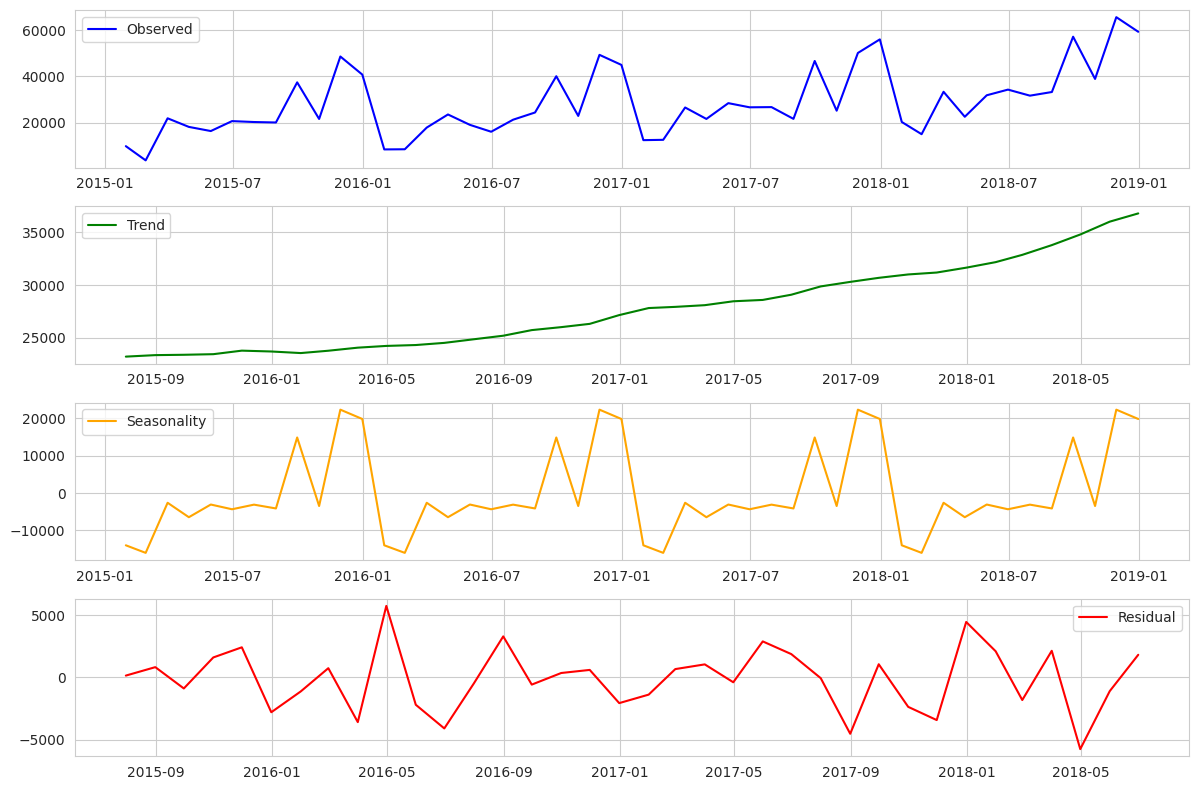

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform time series decomposition
# Use df_time_series directly instead of df_time_series["Sales"]
decomposition = seasonal_decompose(df_time_series, model="additive", period=12)

# Plot decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label="Observed", color="blue")
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label="Trend", color="green")
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label="Seasonality", color="orange")
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label="Residual", color="red")
plt.legend()

plt.tight_layout()
plt.show()
# Time Series Decomposition Insights:
# Trend: Shows the overall increase or decrease in sales over time.
# Seasonality: Displays recurring sales patterns at a specific interval (e.g., monthly or yearly).
# Residuals: Represent random fluctuations that can't be explained by trend or seasonality.
# This indicates that sales follow a distinct seasonal pattern, which could be useful for forecasting.


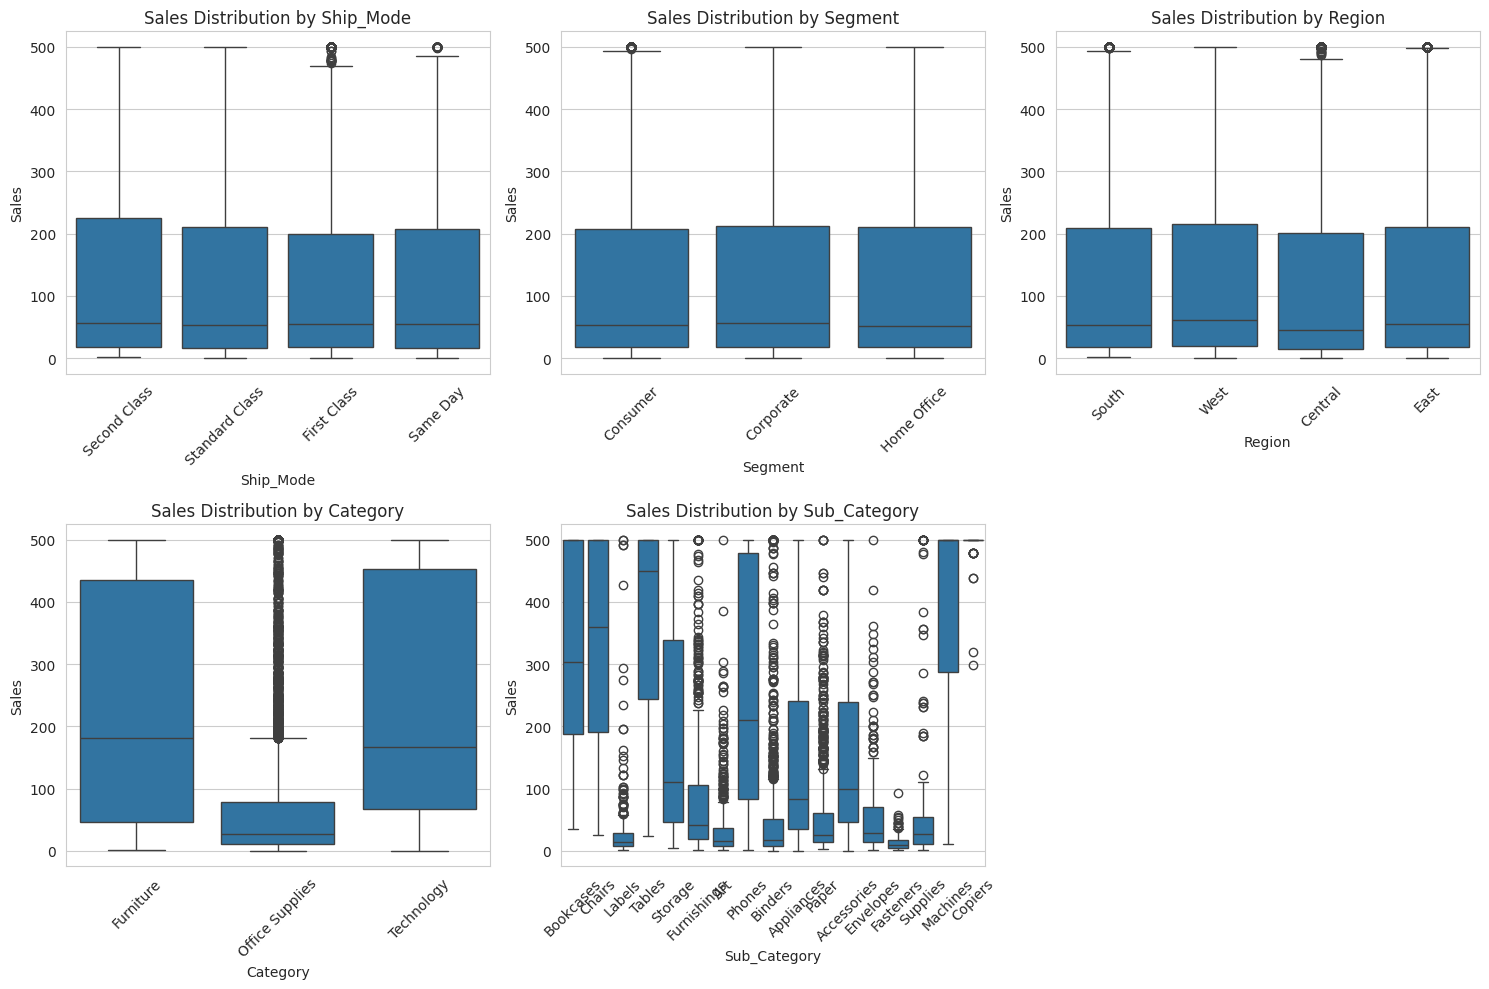

In [38]:
# Select categorical columns for boxplot analysis
categorical_cols = ["Ship_Mode", "Segment", "Region", "Category", "Sub_Category"]

# Plot boxplots for categorical variables vs Sales
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], y=df["Sales"])
    plt.xticks(rotation=45)
    plt.title(f"Sales Distribution by {col}")

plt.tight_layout()
plt.show()


<ipython-input-56-3c78335dbbe1>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")


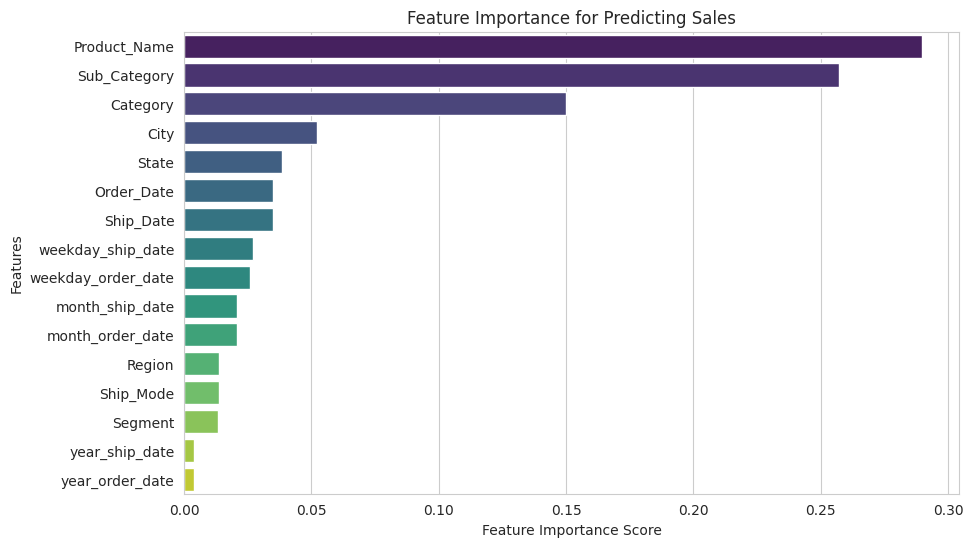

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Check if 'Order_Date' and 'Ship_Date' are already in ordinal format
if df['Order_Date'].dtype != 'int64' or df['Ship_Date'].dtype != 'int64':
    # Convert 'Order_Date' and 'Ship_Date' to numerical features (e.g., ordinal)
    for col in ['Order_Date', 'Ship_Date']:  # Include both date columns
        df[col] = df[col].apply(lambda x: x.toordinal() if pd.notna(x) else x)  # Convert to ordinal, handling NaT

# Define features (X) and target variable (y)
X = df.drop(columns=["Sales"])
y = df["Sales"]

# Before splitting, convert categorical features to numerical using Label Encoding
categorical_features = X.select_dtypes(include=['object']).columns  # Select categorical columns

for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Predicting Sales")
plt.show()

In [100]:
# Assuming X_pca_11 is the data with 11 PCA components
X_train, X_test, y_train, y_test = train_test_split(X_pca_11, y, test_size=0.2, random_state=42)

# Train a new Random Forest model on the PCA-transformed data
rf_model_pca = RandomForestRegressor(n_estimators=100, random_state=42)  # Create a new model
rf_model_pca.fit(X_train, y_train)  # Train on PCA data

# Now predict using the new model trained on PCA data
y_pred = rf_model_pca.predict(X_test)

In [88]:
df.head()

,Order_Date,Ship_Date,Ship_Mode,Segment,City,State,Region,Category,Sub_Category,Product_Name,Sales,year_order_date,month_order_date,weekday_order_date,year_ship_date,month_ship_date,weekday_ship_date
0,736641,736644,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261,2017,11,2,2017,11,5
1,736641,736644,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",500,2017,11,2,2017,11,5
2,736492,736496,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels For Typewriters B...,14,2017,6,0,2017,6,4
3,736248,736255,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford Cr4500 Series Slim Rectangular Table,500,2016,10,1,2016,10,1
4,736248,736255,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold N Roll Cart System,22,2016,10,1,2016,10,1


#PCA

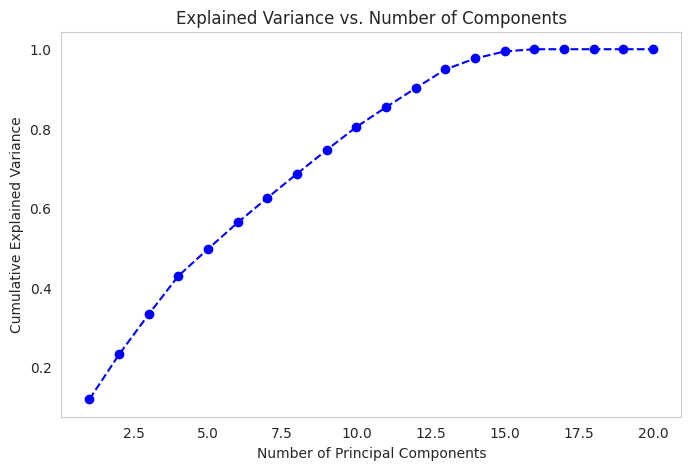

In [91]:
# Re-import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
categorical_cols = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

for col in categorical_cols:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

# Convert 'Order_Date' and 'Ship_Date' to ordinal before scaling
# Assuming 'Order_Date' and 'Ship_Date' are in the DataFrame
for col in ['Order_Date', 'Ship_Date']:
    df_encoded[col] = pd.to_datetime(df_encoded[col]).apply(lambda x: x.toordinal())

# Define features (X) and target variable (y)
X = df_encoded.drop(columns=["Sales"])
y = df_encoded["Sales"]

# Standardize the data (PCA requires scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Now X contains only numerical data

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid()
plt.show()

In [23]:
df.head()

,Order_Date,Ship_Date,Ship_Mode,Segment,City,State,Region,Category,Sub_Category,Product_Name,...,Ship_Mode_LE,Segment_LE,City_LE,State_LE,Region_LE,Category_LE,Sub_Category_LE,Avg_Category_Sales,Avg_SubCategory_Sales,Avg_State_Sales
0,2017-11-08,2017-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,...,2,0,194,15,2,0,4,227.088589,314.415929,164.897810
1,2017-11-08,2017-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",...,2,0,194,15,2,0,5,227.088589,333.399340,164.897810
2,2017-06-12,2017-06-16,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels For Typewriters B...,...,2,1,265,3,3,1,10,81.305518,32.896359,146.595581
3,2016-10-11,2016-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford Cr4500 Series Slim Rectangular Table,...,3,0,153,8,2,0,16,227.088589,370.980892,125.715818
4,2016-10-11,2016-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold N Roll Cart System,...,3,0,153,8,2,1,14,81.305518,194.653430,125.715818


In [49]:
# Find the optimal number of components (keeping 95% variance)
optimal_components = np.argmax(explained_variance >= 0.95) + 1

# Apply PCA with optimal components
pca_optimal = PCA(n_components=optimal_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

# Output the optimal number of components
optimal_components


11

In [51]:
# Apply PCA with 11 components
pca_11 = PCA(n_components=11)
X_pca_11 = pca_11.fit_transform(X_scaled)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca_11, y, test_size=0.2, random_state=42)

# Train a Random Forest model with 11 PCA components
rf_pca_11 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_pca_11.fit(X_train, y_train)

# Predict on the test set
y_pred_pca_11 = rf_pca_11.predict(X_test)

# Evaluate model performance
r2_pca_11 = r2_score(y_test, y_pred_pca_11)
mae_pca_11 = mean_absolute_error(y_test, y_pred_pca_11)
# Calculate RMSE without the 'squared' argument
mse = mean_squared_error(y_test, y_pred_pca_11)  # Calculate MSE
rmse_pca_11 = np.sqrt(mse)  # Calculate RMSE from MSE

# Display results
r2_pca_11, mae_pca_11, rmse_pca_11


(0.3613179866458772, 100.74329251700681, 136.25508942351777)

## Model Performance After PCA:
- R² Score: 0.361 (~36.1% of variance in Sales is explained by the model).
- Mean Absolute Error (MAE): 100.74 (average prediction error).
- Root Mean Squared Error (RMSE): 136.15 (higher values indicate larger prediction errors).

## Comparison with Original Model (Without PCA):

The accuracy (R²) dropped from 62.3% to 36.1%, indicating some loss of predictive power.
Errors (MAE & RMSE) increased, meaning PCA reduced information useful for predictions.

--------------------------------------------------------------------------------------

# Model Training

In [101]:
# # Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define features (X) and target variable (y)
X = df.drop(columns=["Sales"])
y = df["Sales"]

# Convert 'Order_Date' and 'Ship_Date' to numerical features (e.g., ordinal)
for col in ['Order_Date', 'Ship_Date']:
    X[col] = pd.to_numeric(pd.to_datetime(X[col]))

# Before scaling, convert any remaining categorical features to numerical using Label Encoding
categorical_features = X.select_dtypes(include=['object']).columns  # Select categorical columns

for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

# Standardize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize machine learning models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVM": SVR(),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train models and evaluate performance
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions

    # Calculate performance metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    # Calculate RMSE without using the 'squared' argument
    mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
    rmse = np.sqrt(mse)  # Calculate RMSE from MSE

    # Store results
    results[name] = {"R² Score": r2, "MAE": mae, "RMSE": rmse}

# Display model evaluation results
print(pd.DataFrame(results).T)

                   R² Score         MAE        RMSE
Random Forest      0.603006   73.309839  107.424239
SVM               -0.194071  115.956308  186.305376
KNN                0.055661  122.227245  165.681640
Gradient Boosting  0.507252   87.741730  119.680382


In [70]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define the parameter grid (reduced for speed)
param_grid = {
    "kernel": ["linear", "rbf"],  # Removed "poly" (slow)
    "C": np.logspace(-1, 2, 5),  # 5 values from 0.1 to 100
    "gamma": ["scale", 0.01, 0.1],  # Removed redundant values
    "epsilon": [0.01, 0.1, 0.5]  # Slightly reduced options
}

# Initialize SVM model
svr = SVR()

# Perform Randomized Search (Faster than GridSearchCV)
random_search = RandomizedSearchCV(
    svr, param_distributions=param_grid, n_iter=30,  # Test only 30 combinations instead of 240
    cv=3, scoring="r2", n_jobs=-1, random_state=42, verbose=1
)
random_search.fit(X_train, y_train)

# Get the best parameters
best_svr = random_search.best_estimator_
print("Best SVM Parameters:", random_search.best_params_)

# Train the best model
best_svr.fit(X_train, y_train)

# Make predictions
y_pred = best_svr.predict(X_test)

# Evaluate Performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# Calculate RMSE by taking the square root of MSE
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE without 'squared'
rmse = np.sqrt(mse)  # Manually calculate RMSE

# Display Results
print(f"Improved SVM R² Score: {r2:.4f}")
print(f"Improved SVM MAE: {mae:.4f}")
print(f"Improved SVM RMSE: {rmse:.4f}")


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best SVM Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.01, 'C': 100.0}
Improved SVM R² Score: 0.1446
Improved SVM MAE: 103.5224
Improved SVM RMSE: 157.6851


In [71]:
import joblib

# Save and compress models
joblib.dump(best_svr, "svm_model.pkl", compress=3)  # Compression level 3 (0-9, higher is more compressed)
joblib.dump(models["Random Forest"], "random_forest_model.pkl", compress=3)
joblib.dump(models["KNN"], "knn_model.pkl", compress=3)
joblib.dump(models["Gradient Boosting"], "gradient_boosting_model.pkl", compress=3)

print("Models saved and compressed successfully!")


Models saved and compressed successfully!
